In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# LogisticRegression feature selection

In [2]:
wine = load_wine()
print(list(wine.target_names))
print(wine.data)
wine.target[ wine.target ==0 ] = 1 # we use only two classes 
print(wine.target)

['class_0', 'class_1', 'class_2']
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [3]:
X_train, X_test, y_train, y_test = train_test_split( wine.data, wine.target, stratify = wine.target, random_state=42)
print(X_train.shape)

(133, 13)


# Zad

Wykonaj algorytm LogisticRegression z 

* C = 1


In [6]:
log_reg_1 = LogisticRegression(C = 1, random_state=42, max_iter=10_000)
log_reg_1.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=10000, random_state=42)

# Zad

Wykonaj algorytm LogisticRegression z 

* C = 100


In [7]:
log_reg_2 = LogisticRegression(C = 100, random_state=42, max_iter=10_000)
log_reg_2.fit(X_train, y_train)

LogisticRegression(C=100, max_iter=10000, random_state=42)

# Zad

Wykonaj algorytm LogisticRegression z 

* C = 0.01


In [8]:
log_reg_3 = LogisticRegression(C = 0.01, random_state=42, max_iter=10_000)
log_reg_3.fit(X_train, y_train)

LogisticRegression(C=0.01, max_iter=10000, random_state=42)

# Zad

Na koniec spójrzmy na współrzędne wykorzystywane przez modele z trzema różnymi ustawieniami parametru regularyzacji C

In [9]:
print("C = 1")
print(log_reg_1.coef_)
print(log_reg_1.intercept_)

C = 1
[[ 9.03806367e-02  6.07074266e-01  1.59295171e-01  2.43811113e-01
  -9.31919127e-04 -4.96638289e-01 -1.90397138e+00 -2.84467853e-02
  -6.95622125e-01  1.05975119e+00 -3.90119223e-01 -9.04427901e-01
   1.03219302e-04]]
[-7.08157763]


In [10]:
print("C = 100")
print(log_reg_2.coef_)
print(log_reg_2.intercept_)

C = 100
[[-1.60280881  1.53942954  1.41073478  0.5615236  -0.01207283 -0.85580475
  -6.87033448 -0.56347389 -2.836187    3.26499036 -1.58514419 -2.57546163
   0.01023964]]
[-0.26068099]


In [11]:
print("C = 0.01")
print(log_reg_3.coef_)
print(log_reg_3.intercept_)

C = 0.01
[[ 0.04123244  0.15318525  0.00972737  0.13193945 -0.00501238 -0.09761381
  -0.21352757  0.01186153 -0.08446217  0.32708141 -0.04318327 -0.15406333
  -0.00205443]]
[-3.1567629]


# Zad

Narysuj wykre współrzędnych wykorzystywane przez modele z trzema różnymi ustawieniami parametru regularyzacji C i regularyzacją L1.

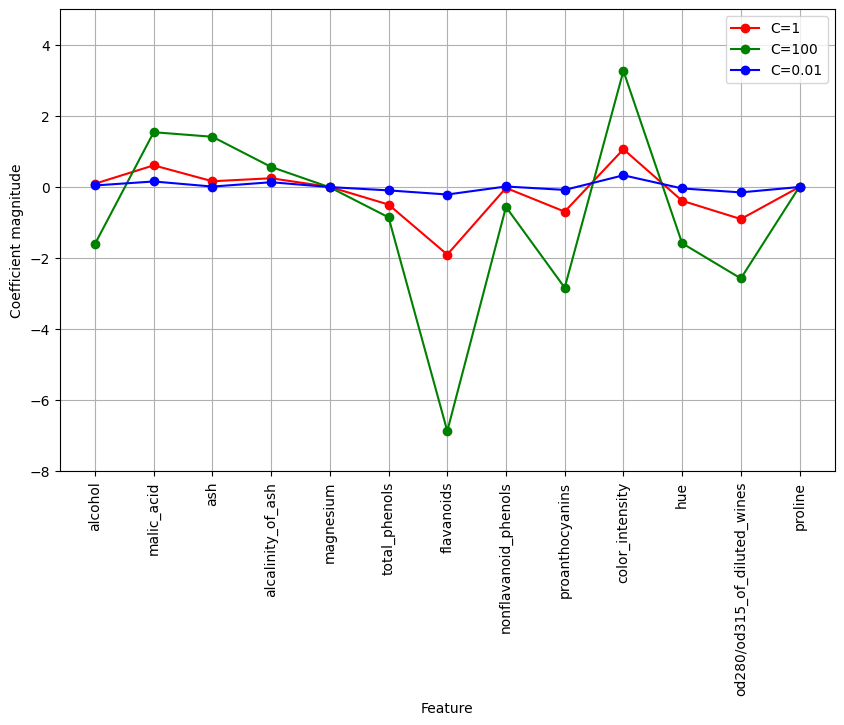

In [17]:
models = [log_reg_1, log_reg_2, log_reg_3]
Cs = [1, 100, 0.01]
colors = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))

for model, C, color in zip(models, Cs, colors):
    plt.plot(model.coef_.T, color=color, marker='o', label=f"C={C}")

plt.xticks(range(wine.data.shape[1]), wine.feature_names, rotation=90)
plt.ylim(-8, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend(loc='best')
plt.grid(True)
plt.show()